**Sobre este arquivo**

Este é um conjunto de dados coletados para analisar a análise comportamental dos consumidores da Amazon, que consiste em uma coleção abrangente de interações com clientes, padrões de navegação dentro do ecossistema da Amazon. Inclui uma ampla gama de variáveis, como dados demográficos do cliente, interação do usuário e avaliações. O conjunto de dados visa fornecer insights sobre as preferências do cliente, hábitos de compra e processos de tomada de decisão na plataforma da Amazon. Ao analisar este conjunto de dados, pesquisadores e analistas podem obter uma compreensão mais profunda do comportamento do consumidor, identificar tendências, otimizar estratégias de marketing e melhorar a experiência geral do cliente na Amazon.

**Importando a Base de Dados**

In [276]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo configurações da biblioteca pandas
pd.set_option('display.max_columns', None)


In [277]:
# Importando a base de dados
df_amazon = pd.read_csv('Amazon Customer Behavior Survey.csv')

# Visualizando a base de dados
display(df_amazon)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,Sometimes,High shipping costs,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,others,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [278]:
# Verificando o tipo dos dados
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [279]:
# Verificando as colunas
df_amazon.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [280]:
# Transformando o tipo das variavéis object para category

variavéis_categoricas = [
 'Gender',                                  
 'Purchase_Frequency',                    
 'Purchase_Categories',                   
 'Personalized_Recommendation_Frequency',
 'Browsing_Frequency',                    
 'Product_Search_Method',                 
 'Search_Result_Exploration',
 'Add_to_Cart_Browsing',                    
 'Cart_Completion_Frequency',              
 'Cart_Abandonment_Factors',               
 'Saveforlater_Frequency',                
 'Review_Left',                           
 'Review_Reliability',                      
 'Review_Helpfulness',
 'Recommendation_Helpfulness',
 'Service_Appreciation',
 'Personalized_Recommendation_Frequency',              
 'Improvement_Areas'      
   ]

for col in variavéis_categoricas:
    df_amazon[col] = df_amazon[col].astype('category')

# Transformando o tipo da variavel Timestamp
df_amazon['Timestamp'] = pd.to_datetime(df_amazon['Timestamp'])

# Visualizando as mudanças
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype                    
---  ------                                  --------------  -----                    
 0   Timestamp                               602 non-null    datetime64[ns, UTC-05:30]
 1   age                                     602 non-null    int64                    
 2   Gender                                  602 non-null    category                 
 3   Purchase_Frequency                      602 non-null    category                 
 4   Purchase_Categories                     602 non-null    category                 
 5   Personalized_Recommendation_Frequency   602 non-null    category                 
 6   Browsing_Frequency                      602 non-null    category                 
 7   Product_Search_Method                   600 non-null    category                 
 8   Search_Result_Explor

C:\Users\55119\AppData\Local\Temp\ipykernel_52476\820446205.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_amazon['Timestamp'] = pd.to_datetime(df_amazon['Timestamp'])


In [281]:
# Verificando valores duplicados
linhas_duplicadas = df_amazon.duplicated().value_counts()

print(linhas_duplicadas)

False    602
Name: count, dtype: int64


In [282]:
# Verificando a presença de valores NaN
valores_ausentes = df_amazon.isnull().sum()

print(valores_ausentes)

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [283]:
# Remover linhas que têm pelo menos um valor nulo
df_amazon = df_amazon.dropna()

# Verificando a remoção 
print(valores_ausentes)

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

**Analisando os dados**

**Perguntas para guair a análise**

**Idade (age):**

Entender a distribuição etária dos consumidores pode ajudar a segmentar o mercado e adaptar estratégias de marketing.

**Gênero (gender):**

Conhecer a proporção de gêneros dos clientes ajuda a criar campanhas mais direcionadas e personalizadas.

**Frequência de Compras (Purchase_Frequency):**

Identificar a frequência de compras pode ajudar a segmentar clientes em grupos como "compradores frequentes" e "compradores ocasionais", permitindo estratégias de retenção diferenciadas.
 
**Categorias de Compras (Purchase_Categories):**

Saber as categorias de produtos mais compradas pode ajudar a direcionar estoque, marketing e ofertas.

**Frequência de Recomendações Personalizadas (Personalized_Recommendation_Frequency):**

Avaliar a eficácia das recomendações personalizadas e seu impacto nas compras.

**Frequência de Navegação (Browsing_Frequency):**

Entender os hábitos de navegação pode ajudar a melhorar a experiência do usuário e a interface do site/app.

**Método de Pesquisa de Produtos (Product_Search_Method):**

Compreender os métodos de pesquisa preferidos pode ajudar a otimizar a funcionalidade de busca do site/app.

**Exploração dos Resultados de Pesquisa (Search_Result_Exploration):**

Saber como os usuários exploram os resultados pode ajudar a melhorar o algoritmo de classificação de produtos.

**Importância das Avaliações de Clientes (Customer_Reviews_Importance):**

Avaliar a influência das avaliações nas decisões de compra pode ajudar a fomentar a criação de avaliações mais detalhadas e úteis.

**Navegação e Adição ao Carrinho (Add_to_Cart_Browsing):**

Entender este comportamento pode ajudar a melhorar as estratégias de conversão.

**Frequência de Conclusão de Compra (Cart_Completion_Frequency):**

Identificar a taxa de conclusão pode ajudar a entender e reduzir o abandono decarrinho. 

**Fatores de Abandono de Carrinho (Cart_Abandonment_Factors):**

Compreender as razões do abandono pode ajudar a implementar soluções para reduzir este comportamento.

**Frequência de Uso do "Salvar para Mais Tarde" (Saveforlater_Frequency):**

Saber a frequência de uso deste recurso pode ajudar a aprimorar a funcionalidade e estratégias de remarketing.

**Deixar Avaliação (Review_Left):**

Incentivar a criação de avaliações pode aumentar a confiança de outros consumidores.

**Confiabilidade das Avaliações (Review_Reliability):**

Avaliar a confiança nas avaliações pode ajudar a combater avaliações falsas e melhorar a qualidade das mesmas.

**Utilidade das Avaliações (Review_Helpfulness):**

Garantir que as avaliações são úteis pode melhorar a experiência de compra e aumentar as conversões.

**Frequência de Recomendações Personalizadas (Personalized_Recommendation_Frequency):**

Verificar a frequência das recomendações e seu impacto nas compras.


In [284]:
# Análise descritiva
analise_descritiva = df_amazon.describe()

# Exibindo a análise
display(round(analise_descritiva,2))


,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,600.00,600.00,600.00,600.00,600.00
mean,30.78,2.48,2.70,2.67,2.46
std,10.18,1.19,1.04,0.90,1.01
min,3.00,1.00,1.00,1.00,1.00
25%,23.00,1.00,2.00,2.00,2.00
50%,26.00,3.00,3.00,3.00,2.00
75%,36.00,3.00,3.00,3.00,3.00
max,67.00,5.00,5.00,5.00,5.00


**Análise**

**Age:** A média de idade entre os clientes é de 30,78 anos, com um desvio padrão de 10,18 anos. A idade mínima é de 3 anos e a máxima é de 67 anos, indicando uma grande variação de idade entre os consumidores.

**Customer_Reviews_Importance:** A importância das avaliações dos clientes tem uma média de 2,48, com um valor máximo de 5,00 e um valor mínimo de 1,00 ponto. Isso sugere que, em média, os clientes consideram as avaliações como moderadamente importantes..

**Personalized_Recommendation_Frequency** A frequência de recomendações personalizadas tem uma média de 2,70 e um desvio padrão de 1,04. Os valores variam de 1,00 a 5,00, indicando que as recomendações são aceitas em parte pelos consumidores, mas há variação na frequência com que são utilizadas.

**Rating_Accuracy:** A precisão das recomendações tem uma média de 2,67 pontos, com um desvio padrão de 0,90. Os valores variam de 1,00 a 5,00, o que indica um nível moderado de aprovação pelos clientes.

**Shopping_Satisfaction:** A satisfação geral com as compras tem uma média de 2,46 pontos, com valores variando de 1,00 a 5,00 e um desvio padrão de 1,01. Isso sugere uma grande variação na satisfação dos clientes, indicando que alguns estão muito satisfeitos, enquanto outros estão insatisfeitos com sua experiência de compra.

In [285]:
# Verificando a frequência 
frequencia_dados = df_amazon[[
 'Gender',                                  
 'Purchase_Frequency',                    
 'Purchase_Categories',                   
 'Personalized_Recommendation_Frequency',
 'Browsing_Frequency',                    
 'Product_Search_Method',                 
 'Search_Result_Exploration',
 'Add_to_Cart_Browsing',                    
 'Cart_Completion_Frequency',              
 'Cart_Abandonment_Factors',               
 'Saveforlater_Frequency',                
 'Review_Left',                           
 'Review_Reliability',                      
 'Review_Helpfulness',
 'Recommendation_Helpfulness',
 'Service_Appreciation',                   
 'Improvement_Areas'       
    
]].mode()

# Verificando a frequência
display(frequencia_dados)

,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Recommendation_Helpfulness,Service_Appreciation,Improvement_Areas
0,Female,Few times a month,Beauty and Personal Care,No,Few times a week,categories,Multiple pages,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Moderately,Yes,Sometimes,Product recommendations,Customer service responsiveness


**Apuração de frequência**

**Gender (Gênero):**

Moda: Female (Feminino)
A maioria dos respondentes são do gênero feminino.

**Purchase_Frequency (Frequência de Compras):**

Moda: Few times a month (Algumas vezes por mês)
A maioria dos consumidores faz compras na Amazon algumas vezes por mês.

**Purchase_Categories (Categorias de Compras):**

Moda: Beauty and Personal Care (Beleza e Cuidados Pessoais)
A categoria de produtos mais comprada pelos consumidores é Beleza e Cuidados Pessoais.

**Personalized_Recommendation_Frequency (Frequência de Recomendações Personalizadas):**

Moda: No (Não)
A maioria dos consumidores não utiliza as recomendações personalizadas para fazer compras.

**Browsing_Frequency (Frequência de Navegação):**

Moda: Few times a week (Algumas vezes por semana)
A maioria dos consumidores navega no site ou aplicativo da Amazon algumas vezes por semana.

**Product_Search_Method (Método de Pesquisa de Produtos):**

Moda: categories (categorias)
A maioria dos consumidores pesquisa produtos navegando por categorias.

**Search_Result_Exploration (Exploração de Resultados de Pesquisa):**

Moda: Multiple pages (Múltiplas páginas)
A maioria dos consumidores tende a explorar várias páginas de resultados de pesquisa.

**Add_to_Cart_Browsing (Adicionar ao Carrinho Durante a Navegação):**

Moda: Maybe (Talvez)
A resposta mais comum sobre adicionar produtos ao carrinho durante a navegação é "Talvez", indicando uma incerteza ou variabilidade nesse comportamento.

**Cart_Completion_Frequency (Frequência de Conclusão de Compras no Carrinho):**

Moda: Sometimes (Às vezes)
A maioria dos consumidores conclui a compra dos itens adicionados ao carrinho apenas às vezes.

**Cart_Abandonment_Factors (Fatores de Abandono do Carrinho):**

Moda: Found a better price elsewhere (Encontrou um preço melhor em outro lugar)
O fator mais comum para abandono de carrinho é encontrar um preço melhor em outro lugar.

**Saveforlater_Frequency (Frequência de Uso do Recurso "Salvar para Mais Tarde"):**

Moda: Sometimes (Às vezes)
A maioria dos consumidores usa o recurso "Salvar para Mais Tarde" apenas às vezes.

**Review_Left (Deixou Avaliação):**

Moda: Yes (Sim)
A maioria dos consumidores já deixou uma avaliação de produto na Amazon.

**Review_Reliability (Confiabilidade das Avaliações):**

Moda: Moderately (Moderadamente)
A maioria dos consumidores confia moderadamente nas avaliações de produtos.

**Review_Helpfulness (Utilidade das Avaliações):**

Moda: Yes (Sim)
A maioria dos consumidores encontra informações úteis nas avaliações de outros clientes.

**Recommendation_Helpfulness (Utilidade das Recomendações):**

Moda: Sometimes (Às vezes)
A maioria dos consumidores acha as recomendações úteis apenas às vezes.

**Service_Appreciation (Apreciação dos Serviços):**

Moda: Product recommendations (Recomendações de produtos)
O aspecto mais apreciado dos serviços da Amazon são as recomendações de produtos.

**Improvement_Areas (Áreas de Melhoria):**

Moda: Customer service responsiveness (Resposta do atendimento ao cliente)
A área que mais precisa de melhoria, segundo os consumidores, é a resposta do atendimento ao cliente.

**- Entendendo a distribuição etária dos consumidores**

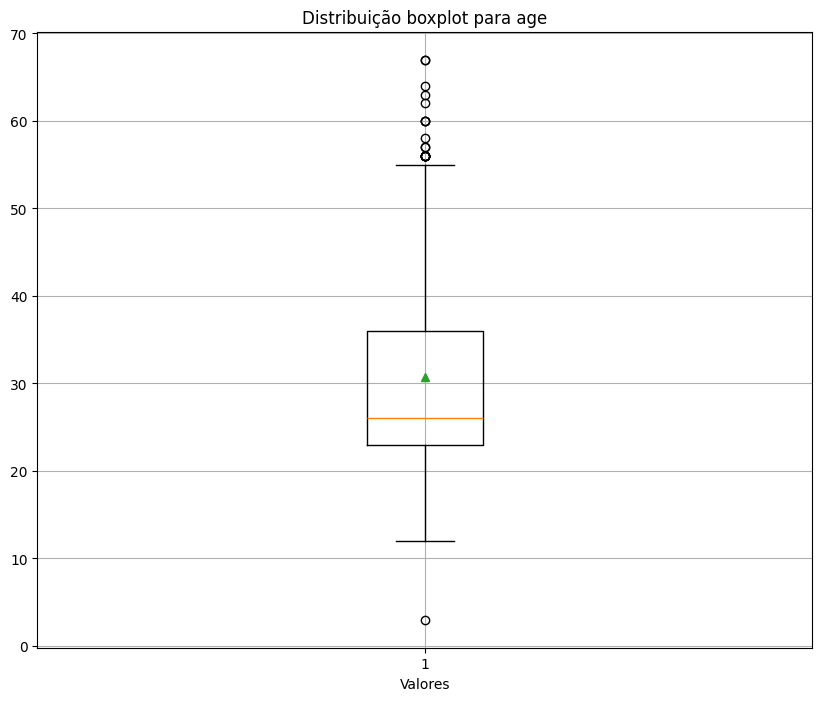

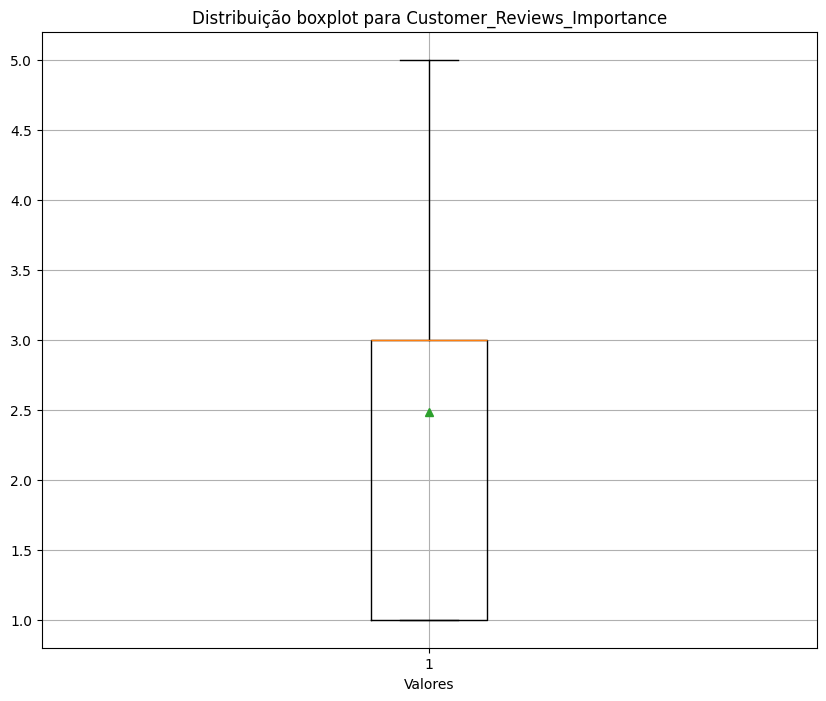

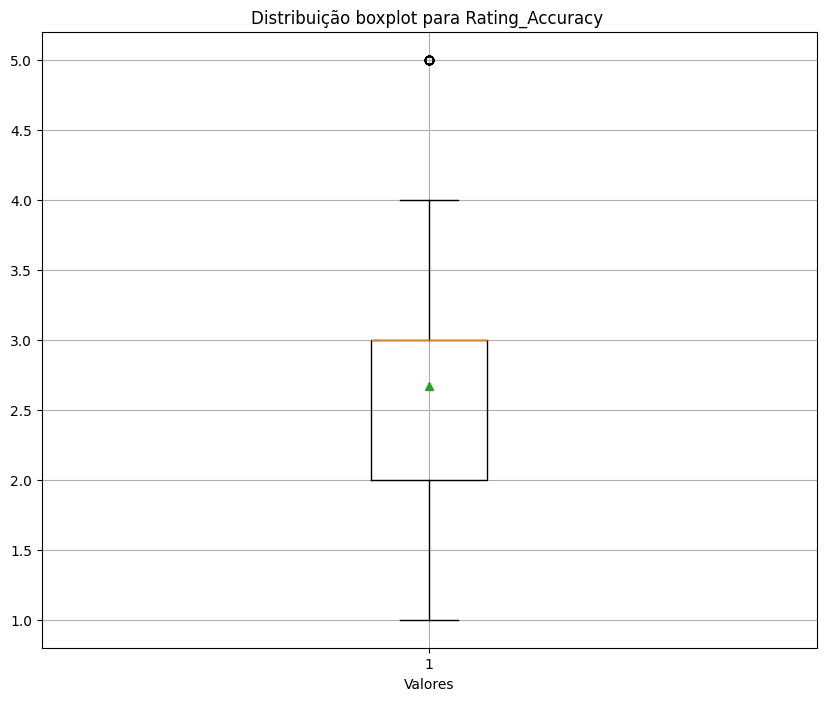

In [286]:
# Selecionando as variáveis numéricas para verificar a presença de outliers
variaveis_numericas = ['age', 'Customer_Reviews_Importance', 'Rating_Accuracy ']

# Gerando um gráfico boxplot para cada variável numérica
for variavel in variaveis_numericas:
    plt.figure(figsize=(10, 8))
    plt.boxplot(df_amazon[variavel].dropna(), showfliers=True, showmeans=True)  # Use dropna() para remover valores NaN
    plt.xlabel('Valores')
    plt.title(f'Distribuição boxplot para {variavel}')
    plt.grid(True)
    plt.show()

In [287]:
# Função para calcular limites usando o método do IQR
def calcular_limites_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

# Lista de variáveis numéricas
variaveis_numericas = ['age', 'Customer_Reviews_Importance', 'Rating_Accuracy ', 'Shopping_Satisfaction']

# Criar uma cópia da base de dados para não modificar o original
df_amazon_limpa = df_amazon.copy()

# Filtrar outliers de cada variável
for variavel in variaveis_numericas:
    limite_inferior, limite_superior = calcular_limites_iqr(df_amazon_limpa, variavel)

    # Filtrar a base de dados para remover os outliers
    df_amazon_limpa = df_amazon_limpa[(df_amazon_limpa[variavel] >= limite_inferior) & (df_amazon_limpa[variavel] <= limite_superior)]

# Atualizar a base de dados original, se necessário
df_amazon = df_amazon_limpa


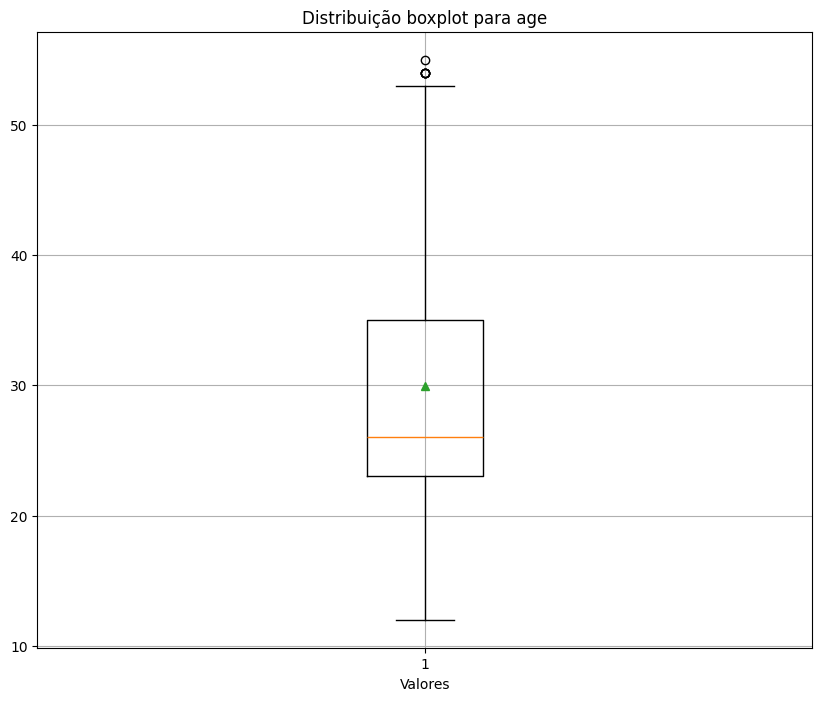

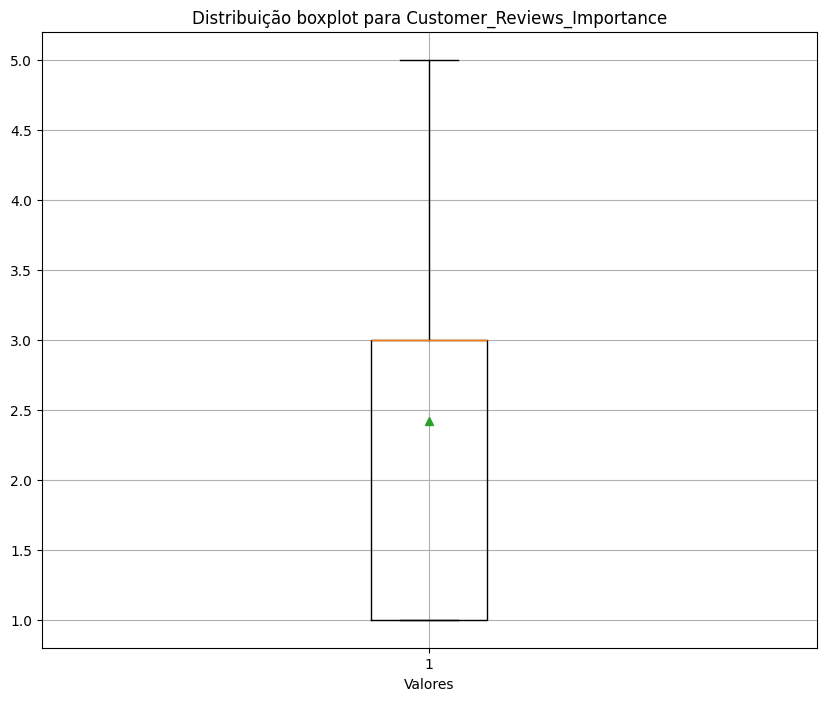

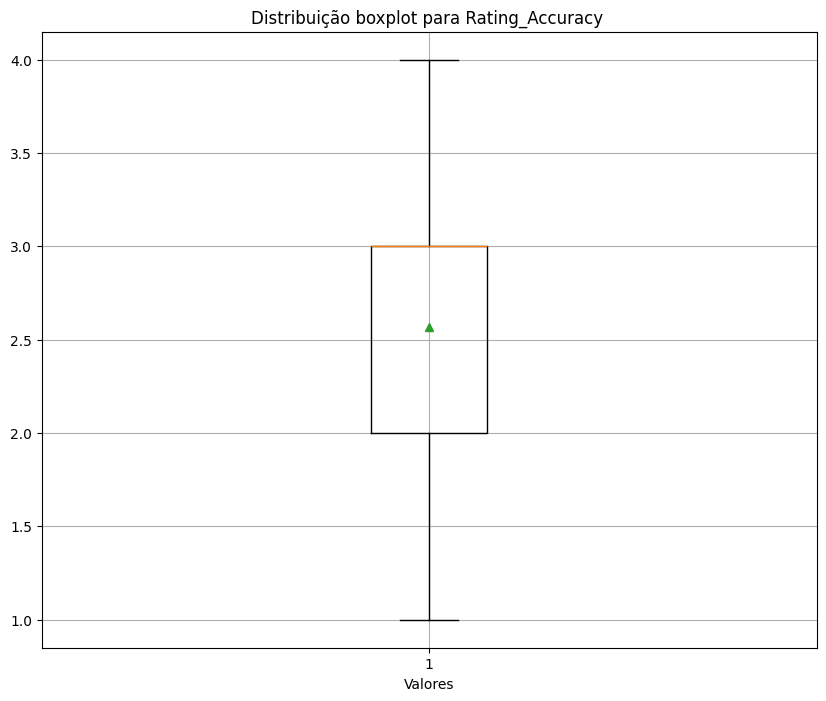

In [288]:
# Verificando as mudanças
variaveis_numericas = ['age', 'Customer_Reviews_Importance', 'Rating_Accuracy ']

# Gerando um gráfico boxplot para cada variável numérica
for variavel in variaveis_numericas:
    plt.figure(figsize=(10, 8))
    plt.boxplot(df_amazon[variavel].dropna(), showfliers=True, showmeans=True)  # Use dropna() para remover valores NaN
    plt.xlabel('Valores')
    plt.title(f'Distribuição boxplot para {variavel}')
    plt.grid(True)
    plt.show()


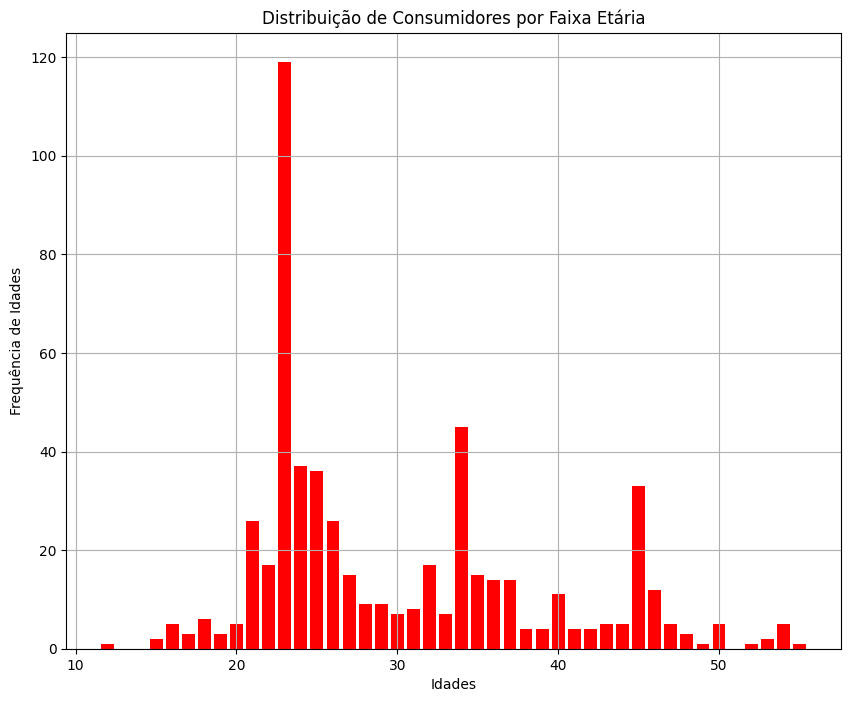

In [289]:
# Contar a frequência de cada idade
frequencias = df_amazon['age'].value_counts().sort_index()

# Plotar o gráfico de barras
plt.figure(figsize=(10,8))
plt.bar(frequencias.index, frequencias.values, color='red')
plt.title('Distribuição de Consumidores por Faixa Etária')
plt.xlabel('Idades')
plt.ylabel('Frequência de Idades')
plt.grid(True)
plt.show()

A maior frequência de consumidores é de 23 naos seguida clientes de 34 e 45, pode-se afirmar que quanto maior a idade menor é a frequência.

**Conhecendo a proporção de gêneros**

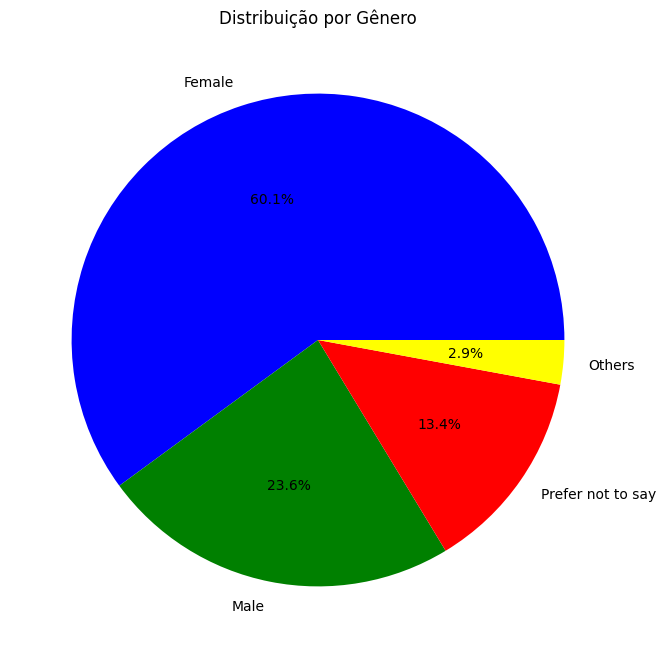

In [290]:
# Contar a frequência de cada gênero
frequencias_genero = df_amazon['Gender'].value_counts()

# Plotar o gráfico de pizza
plt.figure(figsize=(10,8))
plt.pie(frequencias_genero, labels=frequencias_genero.index, autopct='%1.1f%%', colors=['blue', 'green','red','yellow'])
plt.title('Distribuição por Gênero')
plt.show()

O público feminino representa cerca de 60.1% do publico geral, e o público masculino ocupa erca de 23.6%, a porcentagem de pessoas que preferiram não responder é de cerca de 13.4% e o a opção de outros genêros representa 2.9% 


**Identificando a frequência de compras**

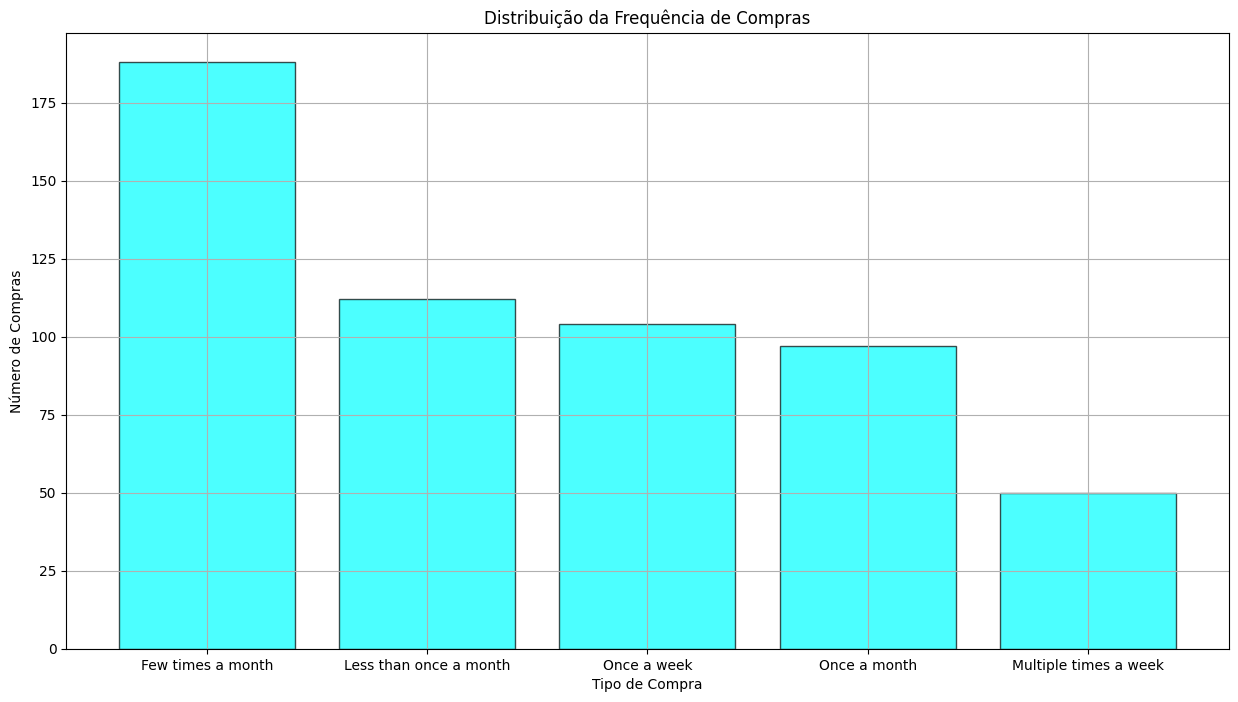

Purchase_Frequency
Few times a month         188
Less than once a month    112
Once a week               104
Once a month               97
Multiple times a week      50
Name: count, dtype: int64


In [291]:
# Contagem de frequência de compras
frequencia_compras = df_amazon['Purchase_Frequency'].value_counts()

# Plotando o gráfico de barras
plt.figure(figsize=(15,8))
plt.bar(frequencia_compras.index, frequencia_compras.values, color='cyan', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Frequência de Compras')
plt.xlabel('Tipo de Compra')
plt.ylabel('Número de Compras')
plt.grid(True)
plt.show()

print(frequencia_compras)


A maioria dos consumidores realiza compras "Few times a month", o que pode indicar um comportamento de compra relativamente frequente e regular. As categorias "Less than once a month" e "Once a week" também têm uma presença significativa, enquanto "Once a month" e "Multiple times a week" são menos comuns. Esses dados podem ajudar a adaptar estratégias de marketing e promoções para atender melhor às diferentes frequências de compra dos consumidores.

**Descobrindo as categorias de produtos mais compradas**

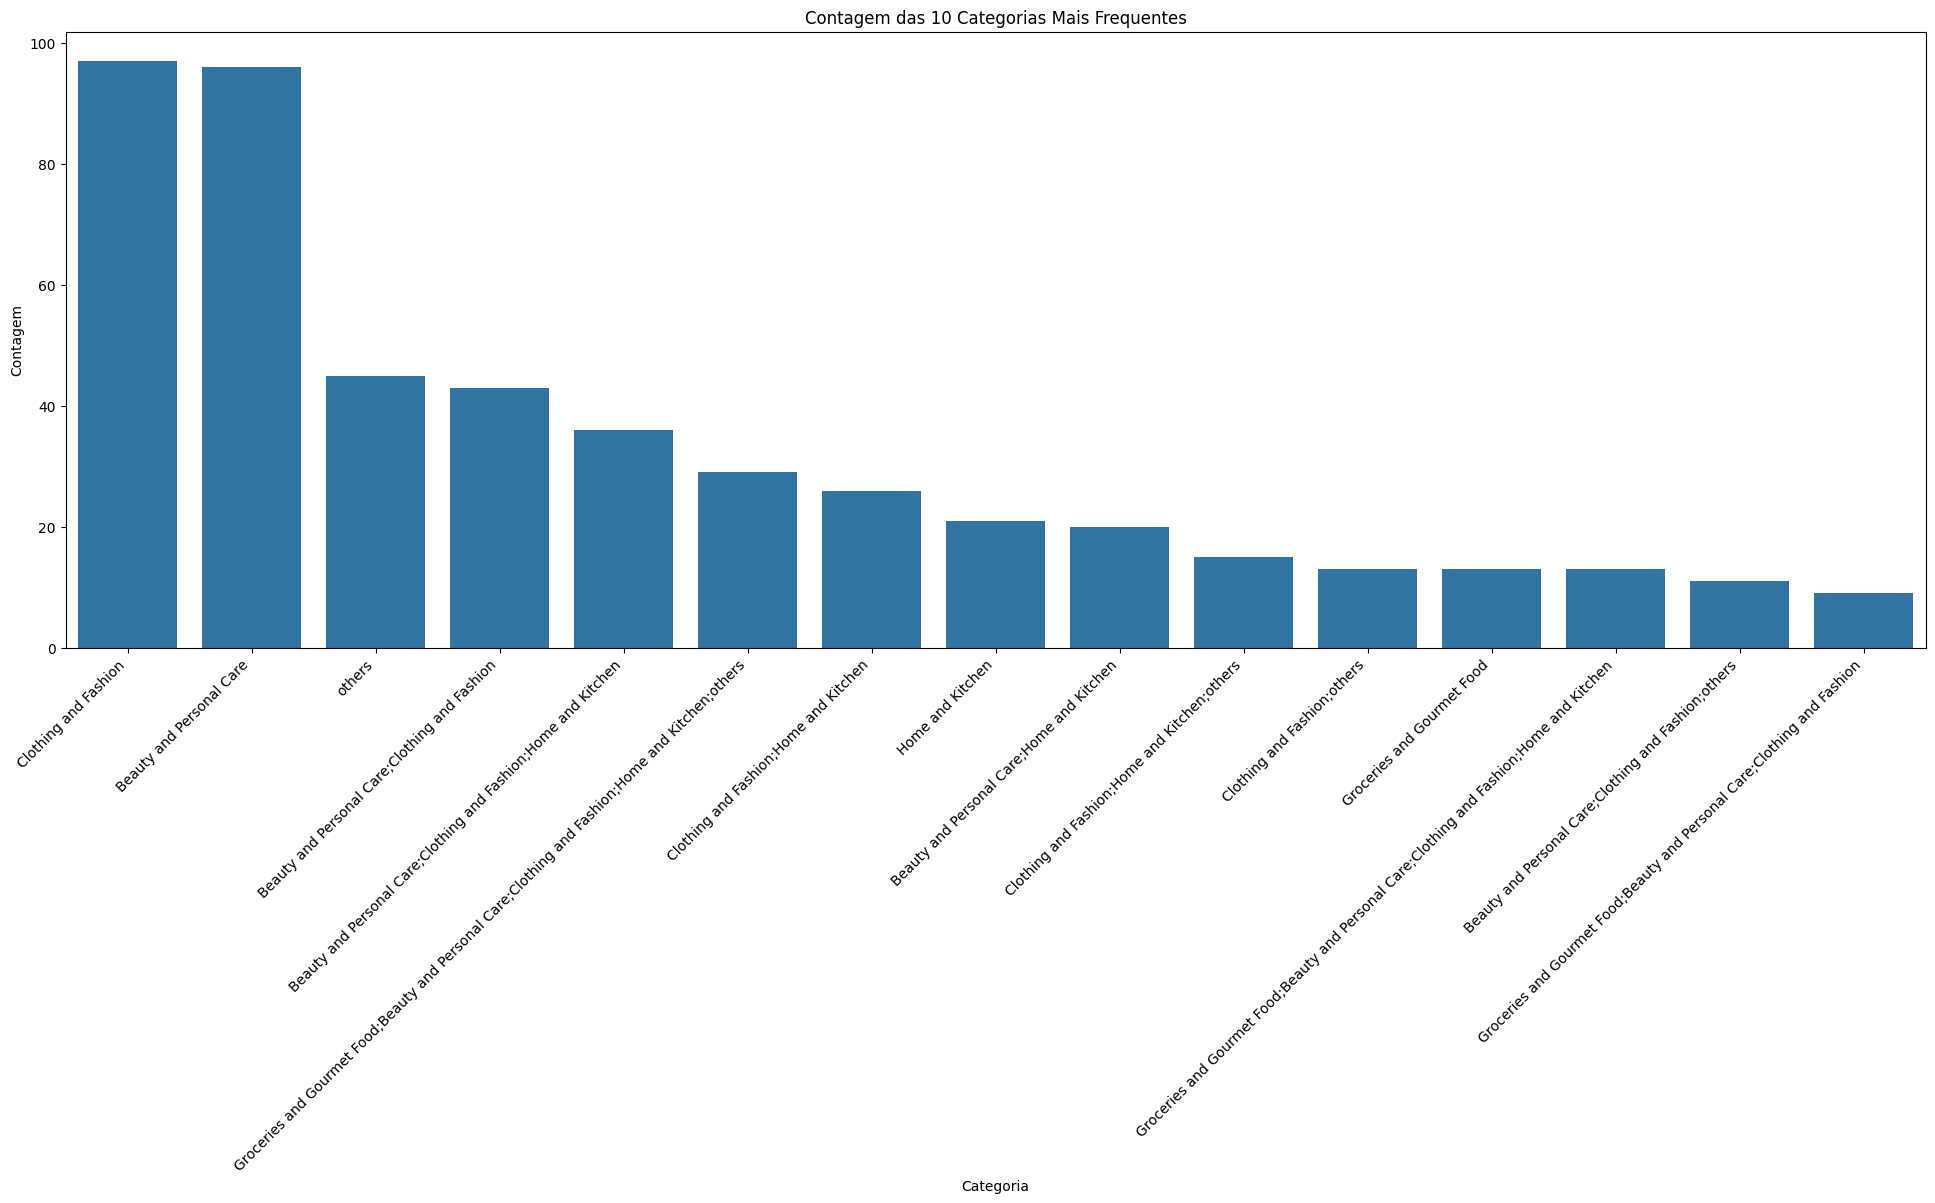

In [292]:
# Calculando as contagens das categorias
contagem_categorias = df_amazon['Purchase_Categories'].value_counts()

# Selecionando as 10 categorias mais frequentes
top_categorias = contagem_categorias.head(15).index

# Filtrando o DataFrame para incluir apenas as categorias selecionadas
df_top_categorias = df_amazon[df_amazon['Purchase_Categories'].isin(top_categorias)]

# Plotando o gráfico com as categorias filtradas
plt.figure(figsize=(24,8))
sns.countplot(x='Purchase_Categories', data=df_top_categorias, order=top_categorias)
plt.title('Contagem das 10 Categorias Mais Frequentes')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos em 45 graus
plt.show()

As categorias mais populares são:
- Clothing and Fashion
- Beauty and Personal Carre
- Others

As demais categorias mantem uma contagem abaixo de 40.

**Avaliando a eficácia das recomendações personalizadas e seu impacto nas compras**

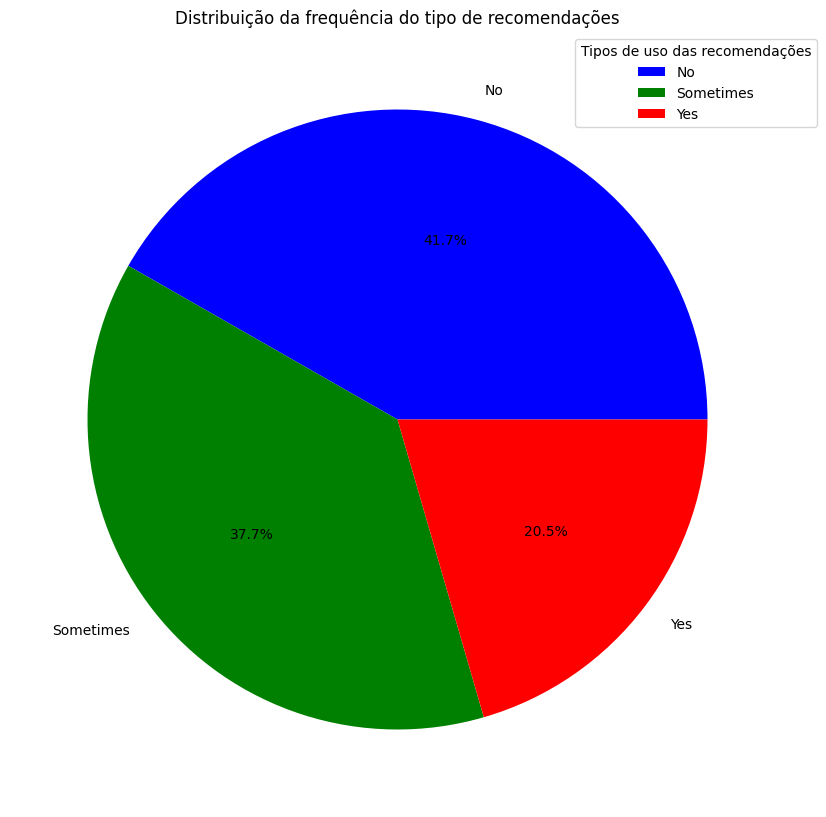

In [293]:
# Contagem de frequência de recomendações personalizadas
contagem_recomendacoes = df_amazon['Personalized_Recommendation_Frequency'].value_counts()

# Plotando o gráfico
plt.figure(figsize=(10,12))
plt.pie(contagem_recomendacoes, labels=contagem_recomendacoes.index, autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Distribuição da frequência do tipo de recomendações')
plt.legend(contagem_recomendacoes.index, title="Tipos de uso das recomendações", bbox_to_anchor=(1.05, 1))
plt.show()



Ao analisar a frequência dos tipos de recomendações personalizadas, percebe-se que há uma variabilidade significativa no uso dessas recomendações entre os consumidores:

**Não Utilizam Recomendações:**

41% dos consumidores não utilizam recomendações personalizadas para realizar suas compras. Isso indica que uma parcela considerável do público prefere confiar em outros métodos de descoberta de produtos ou já tem em mente o que deseja comprar.
Utilizam Recomendações Ocasionalmente:

**Utilizam Recomendações Ocasionalmente:**

37.7% dos consumidores utilizam recomendações personalizadas em alguns casos. Este grupo representa uma parte significativa que, embora não dependa exclusivamente das recomendações, as considera úteis em determinadas situações.
Utilizam Recomendações Frequentemente:

**Utilizam Recomendações Frequentemente:**

20.5% dos consumidores utilizam as recomendações personalizadas com frequência. Este menor grupo de consumidores encontra nas recomendações uma ferramenta confiável e útil para a descoberta de produtos, possivelmente confiando nas sugestões da plataforma para realizar suas compras.

C:\Users\55119\AppData\Local\Temp\ipykernel_52476\768640129.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recomendacao_por_categoria = df_amazon.groupby('Purchase_Categories')['Personalized_Recommendation_Frequency'].value_counts().unstack().fillna(0)


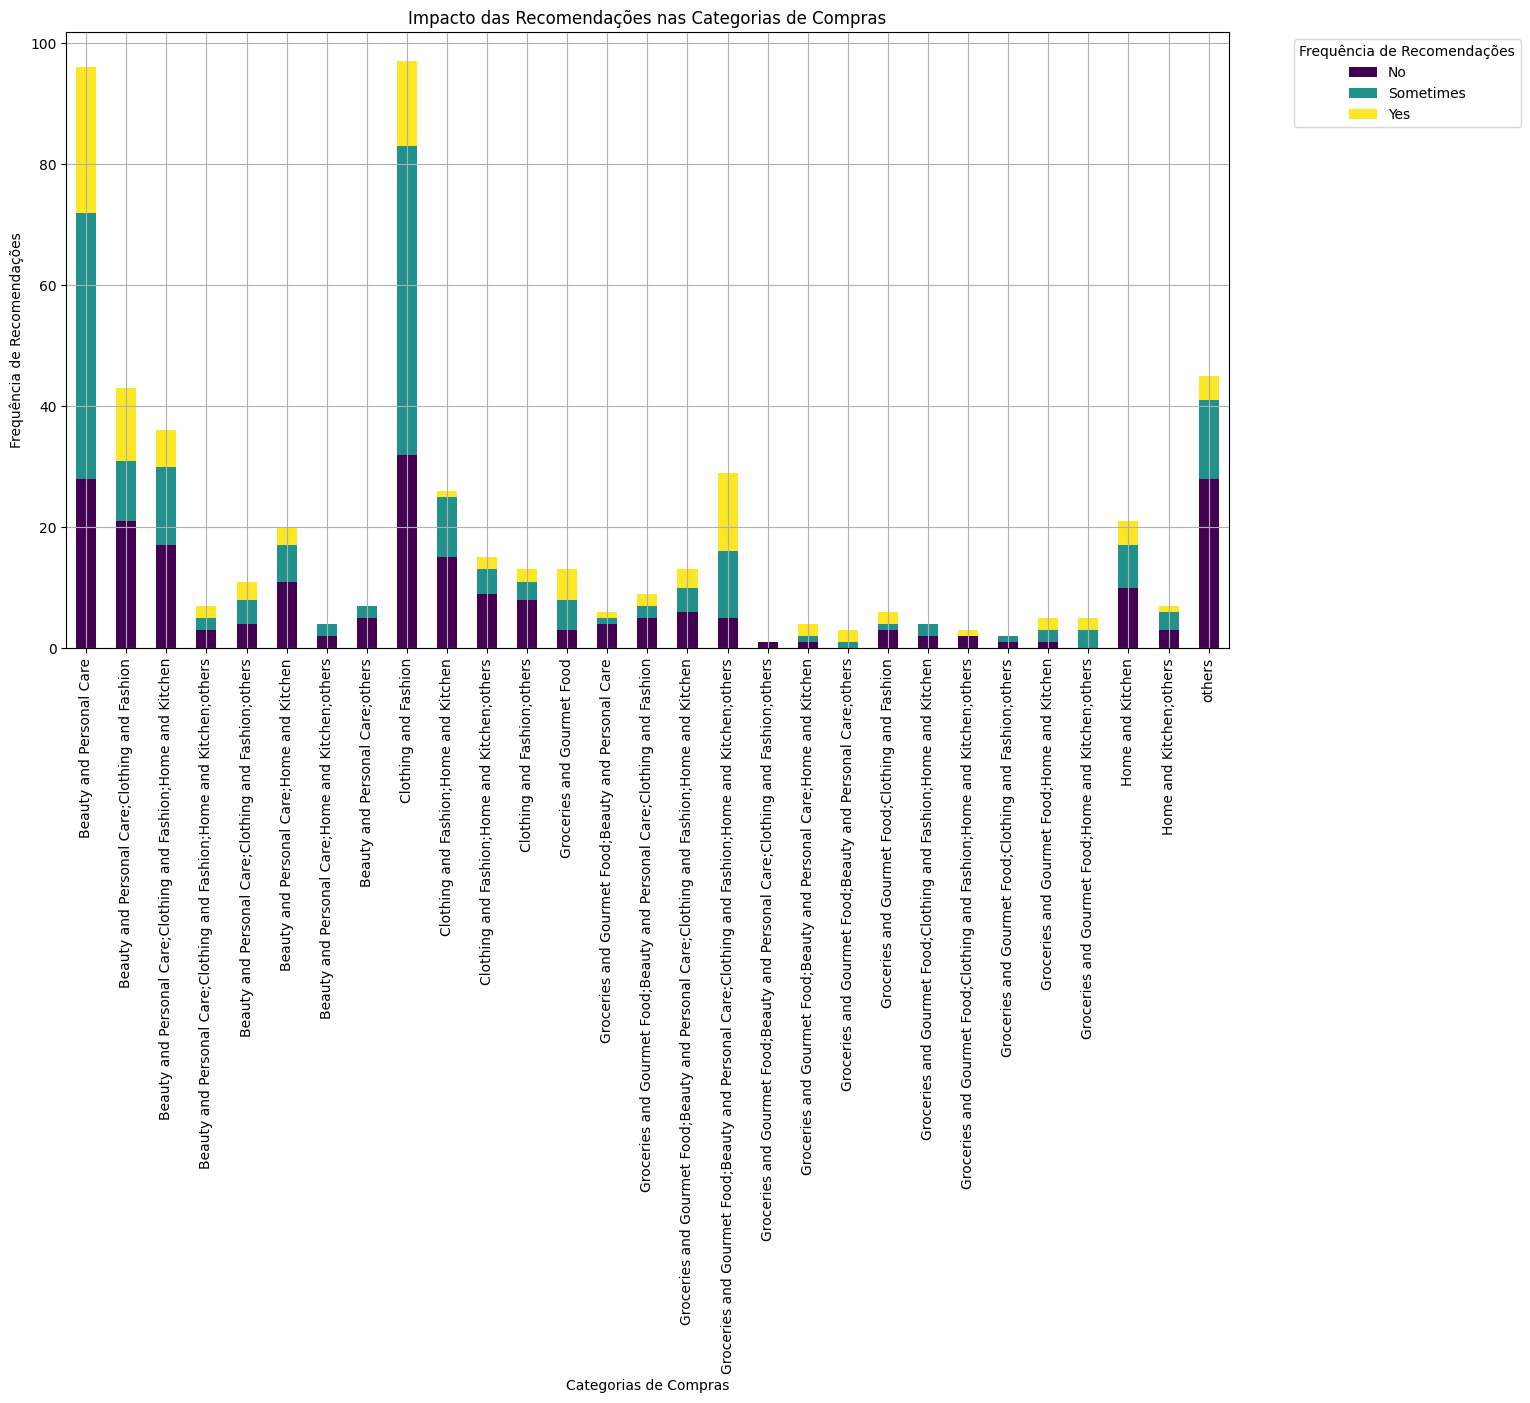

In [294]:
# Agrupar por categorias de compras e contar as frequências de recomendações personalizadas
recomendacao_por_categoria = df_amazon.groupby('Purchase_Categories')['Personalized_Recommendation_Frequency'].value_counts().unstack().fillna(0)

# Plotando o gráfico de barras empilhadas
recomendacao_por_categoria.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Impacto das Recomendações nas Categorias de Compras')
plt.xlabel('Categorias de Compras')
plt.ylabel('Frequência de Recomendações')
plt.legend(title='Frequência de Recomendações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


O impacto das recomendações personalizadas nas categorias de compras é bem varido, dentre as categorias que sofrem um grande impacto estão:

- Beauty and Personal Care: Indica que a maioria do público utiliza a recomendação ocasionalmente nessa categoria e a frequência de se utilizar ou não a recomendação personalizada não sofre grande impacto.

- Clothing and Fashion: Essa categoria indica uma maior rejeição das recomendações e clientes que não dependem excluisvamente das recomendações e uma baixa taxa de aceitação de recomendações.

- Outhers: Essa categoria apresenta que os clientes não utilizam as recomendações como base.

**Entender os hábitos de navegação**

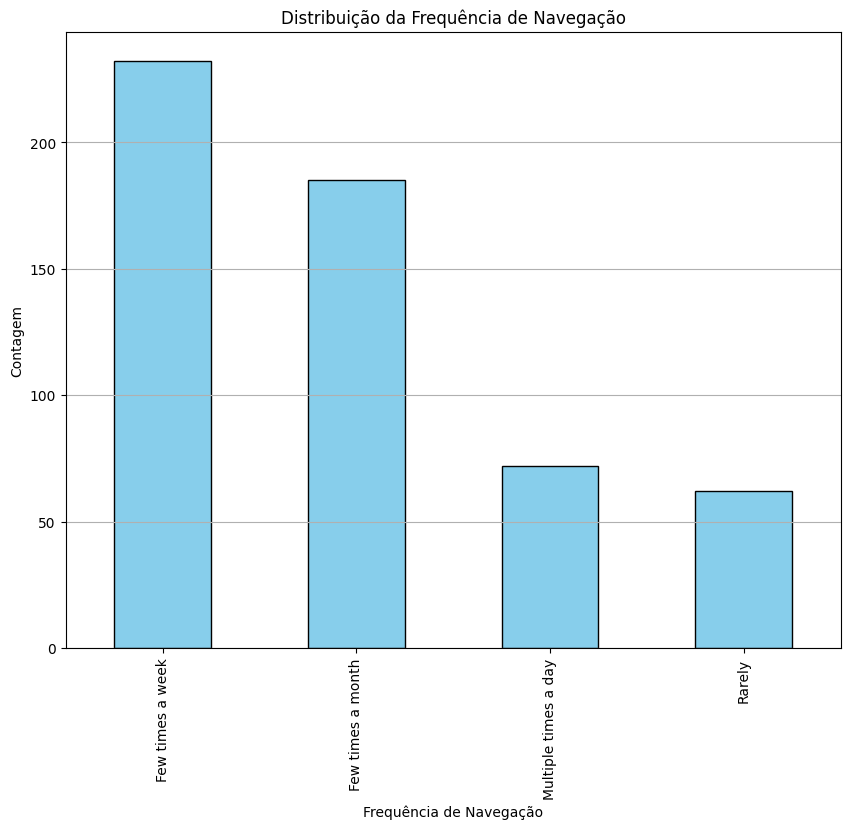

In [295]:
# Contar a frequência de cada valor na coluna 'Browsing_Frequency'
frequencia_navegacao = df_amazon['Browsing_Frequency'].value_counts()

# Plotar o gráfico de barras para visualizar a distribuição
plt.figure(figsize=(10, 8))
frequencia_navegacao.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição da Frequência de Navegação')
plt.xlabel('Frequência de Navegação')
plt.ylabel('Contagem')
plt.grid(axis='y')
plt.show()

Ao analisar o gráfico pode-se perceber que a frequência de navegação dos clientes é preferencialmente semanal do que mensal a depender do tipo de compra.

**Analisando como os usuários exploram os resultados**

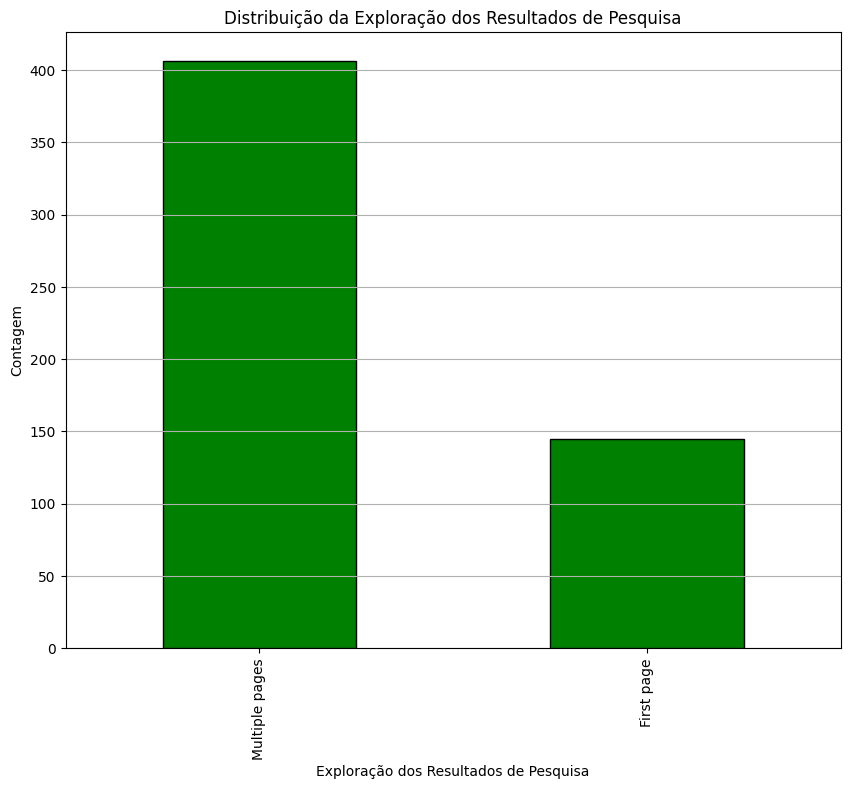

Search_Result_Exploration
Multiple pages    73.68
First page        26.32
Name: count, dtype: float64


In [296]:
# Contar a frequência de cada valor na coluna 'Search_Result_Exploration'
frequencia_exploracao = df_amazon['Search_Result_Exploration'].value_counts()

# Plotar o gráfico de barras para visualizar a distribuição
plt.figure(figsize=(10, 8))
frequencia_exploracao.plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribuição da Exploração dos Resultados de Pesquisa')
plt.xlabel('Exploração dos Resultados de Pesquisa')
plt.ylabel('Contagem')
plt.grid(axis='y')
plt.show()

# Calcular a porcentagem de cada categoria
percentual_exploracao = (frequencia_exploracao / frequencia_exploracao.sum()) * 100
print(round(percentual_exploracao,2))


Cerca de 73% dos clientes utilizam multiplas páginas antes de realizar uma compra, o que indica que os clientes gastam mais tempo na plataforma pesquisando sobre o produto desejado (características) e preço, apenas 26% dos clientes utilizam uma página da platforma para realizar uma compra, indicando que o cliente já conhece o produto ou não é ão exigente na escolha.

**Avaliando a influência das avaliações nas decisões de compra**

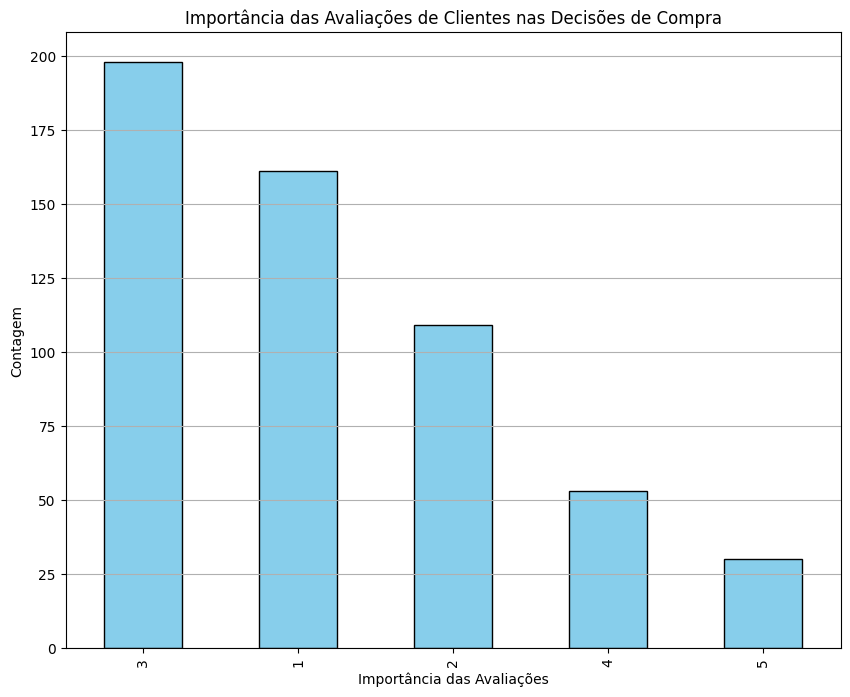

count    551.00
mean       2.42
std        1.16
min        1.00
25%        1.00
50%        3.00
75%        3.00
max        5.00
Name: Customer_Reviews_Importance, dtype: float64

In [297]:
# Contar a frequência de cada valor na coluna 'Customer_Reviews_Importance'
frequencia_avaliacoes = df_amazon['Customer_Reviews_Importance'].value_counts()

# Plotar o gráfico de barras para visualizar a distribuição
plt.figure(figsize=(10, 8))
frequencia_avaliacoes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Importância das Avaliações de Clientes nas Decisões de Compra')
plt.xlabel('Importância das Avaliações')
plt.ylabel('Contagem')
plt.grid(axis='y')
plt.show()

# Análise estatística
frequencia_avaliacoes = df_amazon['Customer_Reviews_Importance'].describe()
display(round(frequencia_avaliacoes,2))

Ao avaliar as estatisticas e o gráfico pode-se perceber que o nível de satisfação dos clientes está em torno de ruim (1) e regular (3), sendo que em média os votos indicam que os clientes possuem um nível baixo de satisfação.

**Entendendo o comportamento de compra (adição ao carrinho)**

C:\Users\55119\AppData\Local\Temp\ipykernel_52476\1770402274.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado_por_frequencia_compra = df_amazon.groupby('Purchase_Frequency')['Add_to_Cart_Browsing'].value_counts().unstack().fillna(0)


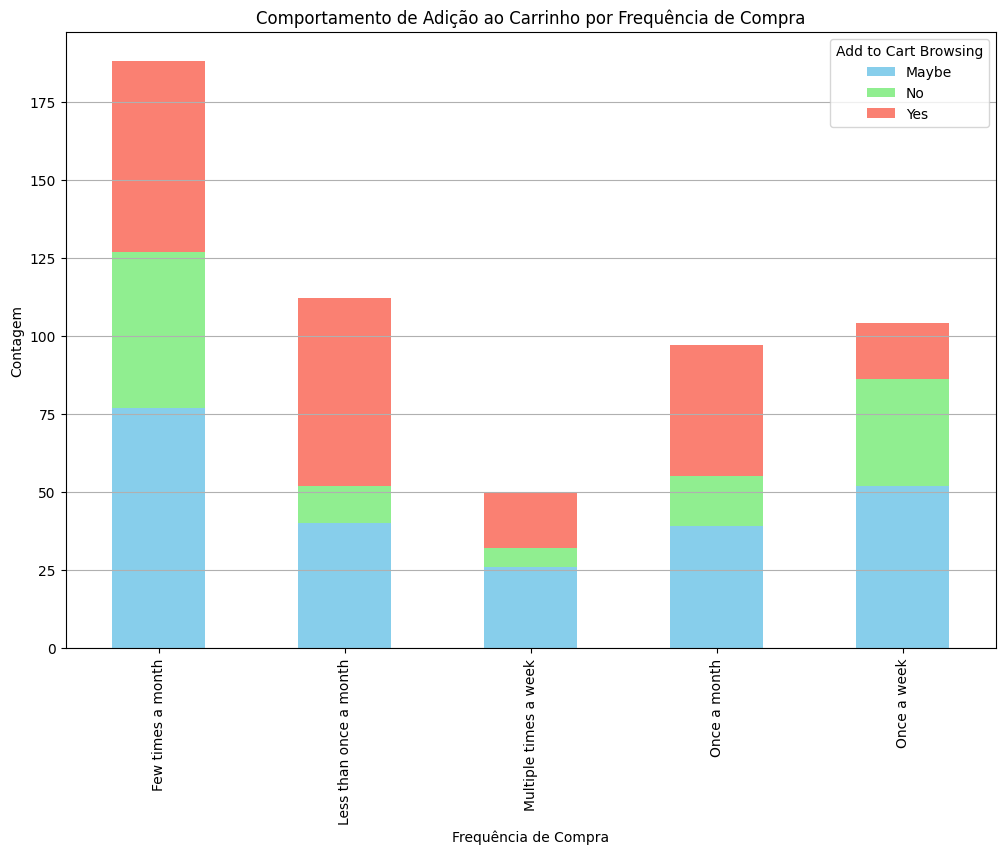

In [298]:
# Agrupar por frequência de compra e contar a frequência de adição ao carrinho
agrupado_por_frequencia_compra = df_amazon.groupby('Purchase_Frequency')['Add_to_Cart_Browsing'].value_counts().unstack().fillna(0)

# Plotar o gráfico de barras empilhadas
agrupado_por_frequencia_compra.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Comportamento de Adição ao Carrinho por Frequência de Compra')
plt.xlabel('Frequência de Compra')
plt.ylabel('Contagem')
plt.legend(title='Add to Cart Browsing')
plt.grid(axis='y')
plt.show()


A maioria dos clientes tem um comportamento de compra moderado, comprando algumas vezes por mês. Apenas uma pequena fração dos consumidores faz compras muito frequentes (várias vezes por semana).


In [299]:
dados = df_amazon['Purchase_Frequency'].value_counts()
print(dados)

Purchase_Frequency
Few times a month         188
Less than once a month    112
Once a week               104
Once a month               97
Multiple times a week      50
Name: count, dtype: int64


**Analisando a Frequência de Conclusão de Compra**

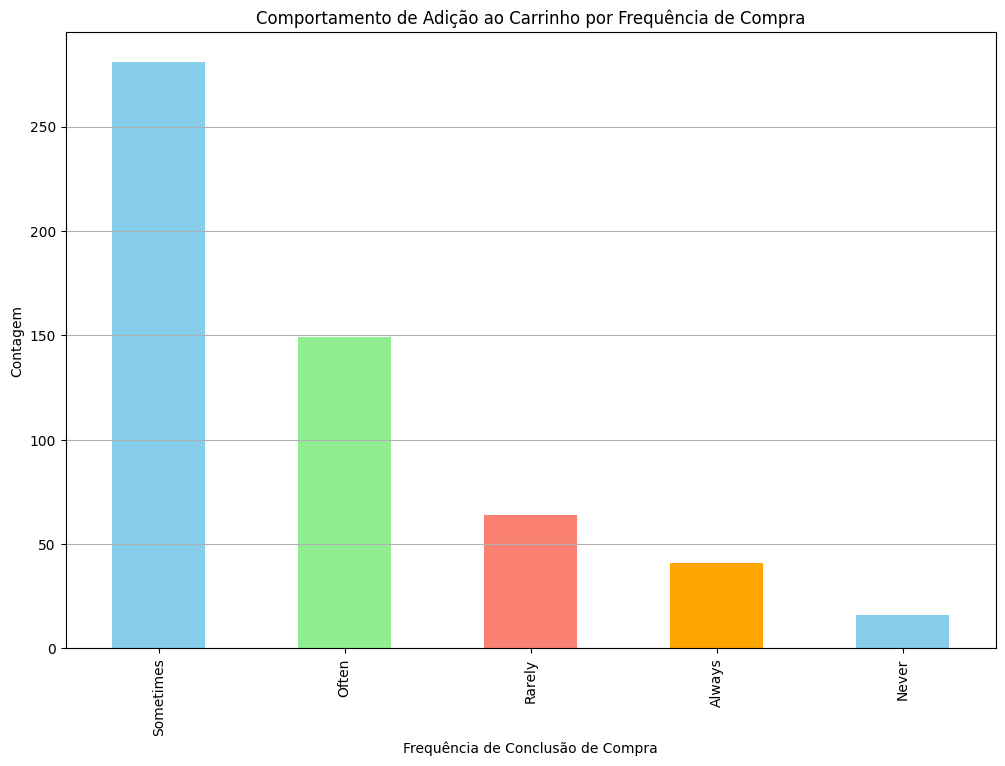

In [300]:
# Contagem de frequência 
frequencia_conclusao_compra = df_amazon['Cart_Completion_Frequency'].value_counts()

# Plotando o gráfico
frequencia_conclusao_compra.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Comportamento de Adição ao Carrinho por Frequência de Compra')
plt.xlabel('Frequência de Conclusão de Compra')
plt.ylabel('Contagem')
plt.grid(axis='y')
plt.show()

Os dados sugerem que há uma grande variabilidade no comportamento de conclusão de compra entre os consumidores. A maioria das pessoas conclui suas compras ocasionalmente, enquanto uma parcela significativa conclui frequentemente. Entretanto, há um número considerável de consumidores que raramente ou nunca finalizam suas compras.

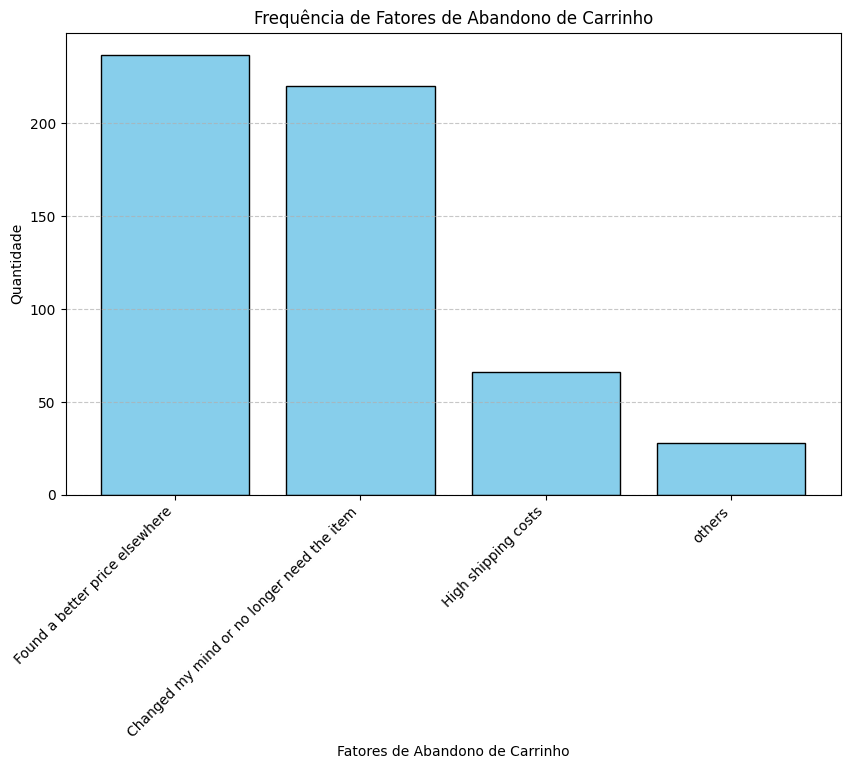

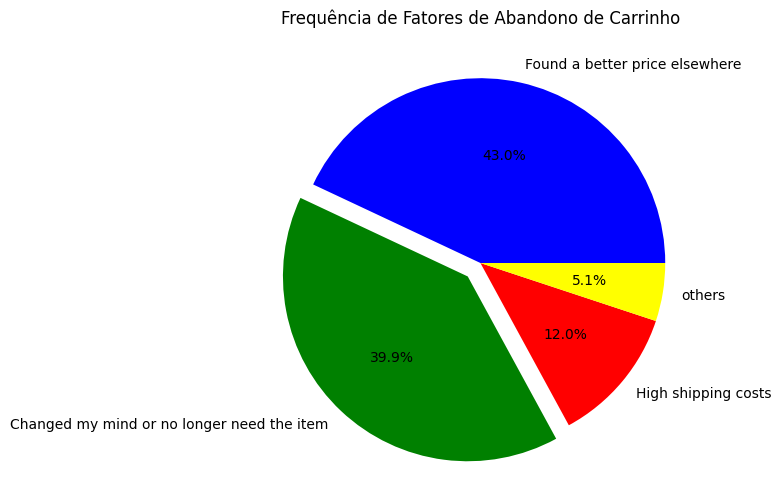

In [301]:
# compreendendo as razões do abandono

# Contagem de frequência dos fatores de abandono de carrinho
frequencia_abandono_carrinho = df_amazon['Cart_Abandonment_Factors'].value_counts()

# Preparar os dados para o gráfico
categorias = frequencia_abandono_carrinho.index
frequencias = frequencia_abandono_carrinho.values

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categorias, frequencias, color='skyblue', edgecolor='black')
plt.xlabel('Fatores de Abandono de Carrinho')
plt.ylabel('Quantidade')
plt.title('Frequência de Fatores de Abandono de Carrinho')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(frequencias, labels=categorias, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'yellow'], explode=[0, 0.1, 0, 0])
plt.title('Frequência de Fatores de Abandono de Carrinho')
plt.show()


O principal motivo para o abandono se encontra na pesquisa do cliente por um produto com um valor melhor (43%), em segundo lugar pode-se notar que a a mudança de ideia sobre o produto (39.9%) também é um fator relevante para fazer com que o cliente abandone a compra, já o custo de envio e outros motivos representam uma pequena parcela do motivo do abandono sendo (12% e 5.1%) dos clientes.

**Frequência de Uso do "Salvar para Mais Tarde"**

C:\Users\55119\AppData\Local\Temp\ipykernel_52476\643510844.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequencia_recurso = df_amazon.groupby(['Purchase_Categories', 'Saveforlater_Frequency']).size().unstack().fillna(0)


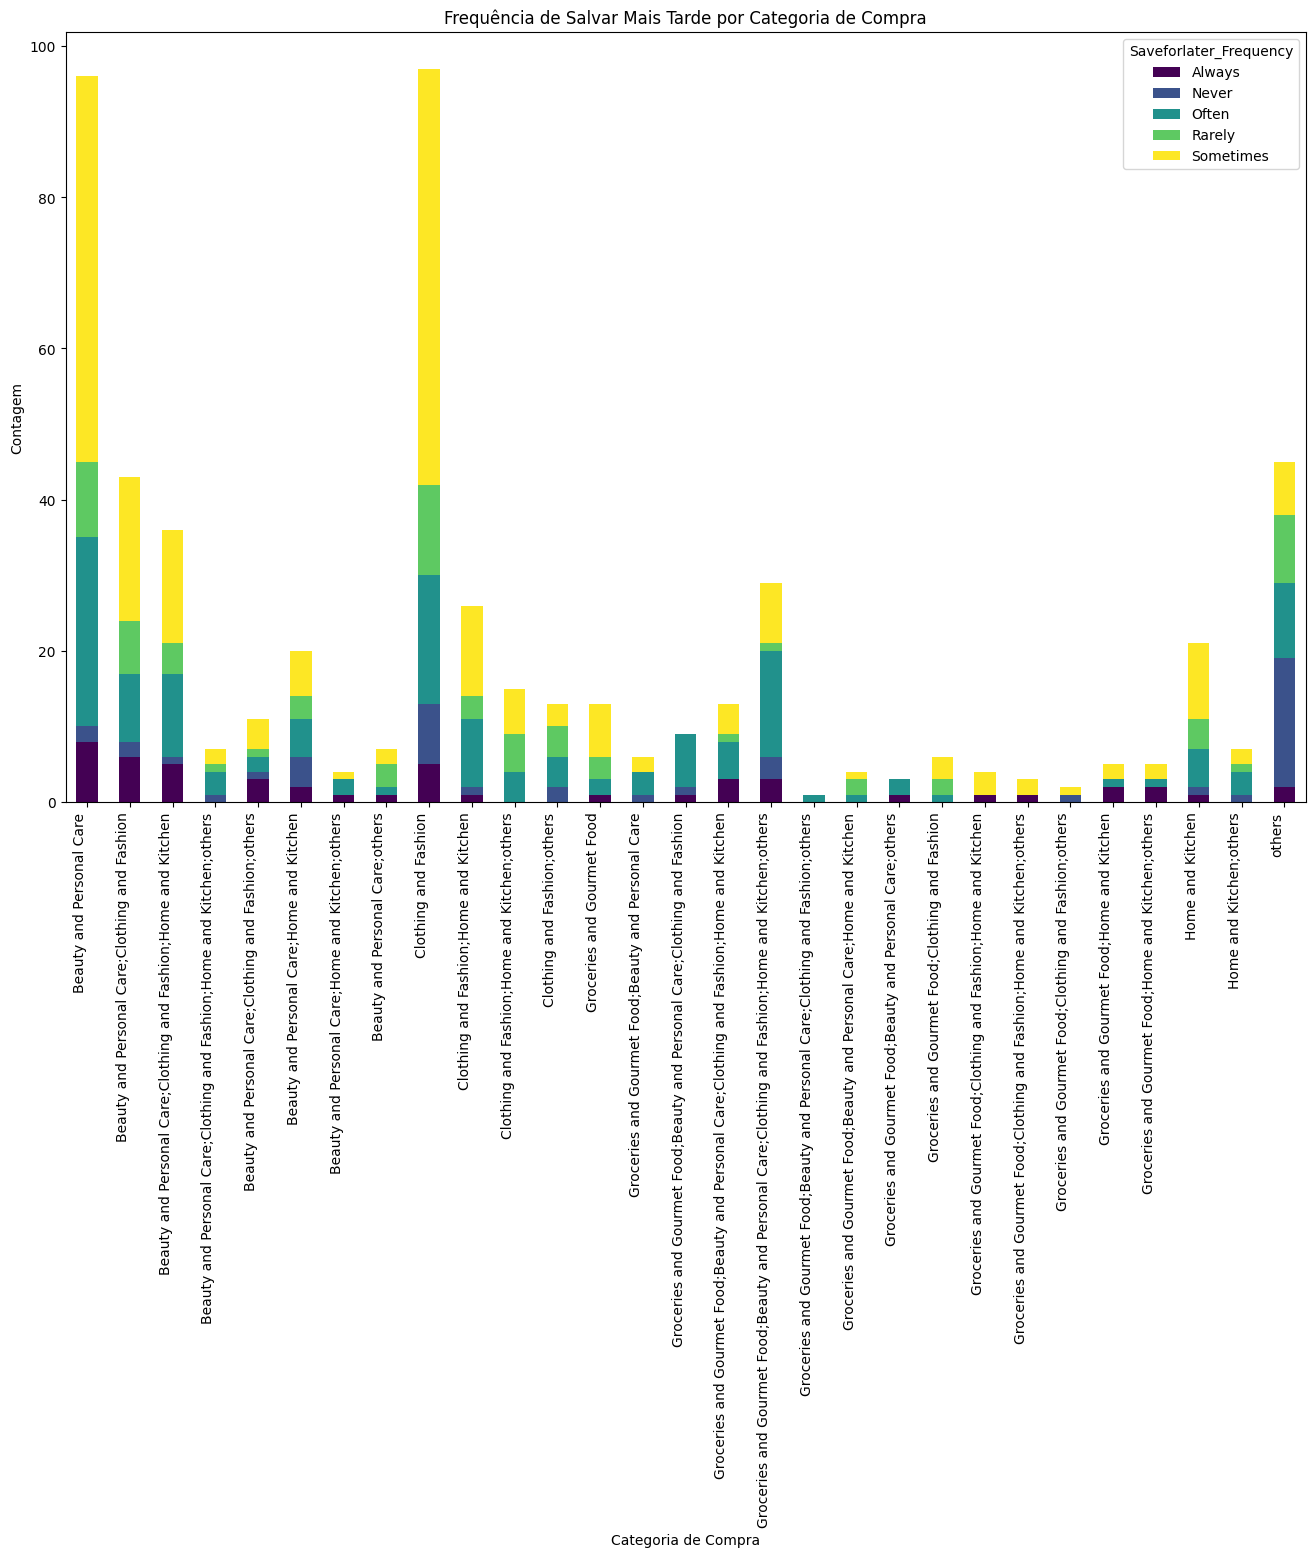

Saveforlater_Frequency
Sometimes    230
Often        148
Rarely        76
Always        50
Never         47
Name: count, dtype: int64


In [308]:
# Agrupando a utilização do recurso "salvar mais tarde" por cada categoria
frequencia_recurso = df_amazon.groupby(['Purchase_Categories', 'Saveforlater_Frequency']).size().unstack().fillna(0)

# Plotando o gráfico
ax = frequencia_recurso.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='viridis')
ax.set_title('Frequência de Salvar Mais Tarde por Categoria de Compra')
ax.set_xlabel('Categoria de Compra')
ax.set_ylabel('Contagem')
plt.xticks(rotation=90, ha='right')
plt.show()


Ao analisar o gráfico pode-se notar que nenhuma categoria sofre impacto relevante pelo uso do recurso, a preferência dos clientes é utilizar o recurso "As vezes" nas principais categorias beauty an personal care e clothing and fashion.

**Avaliações**

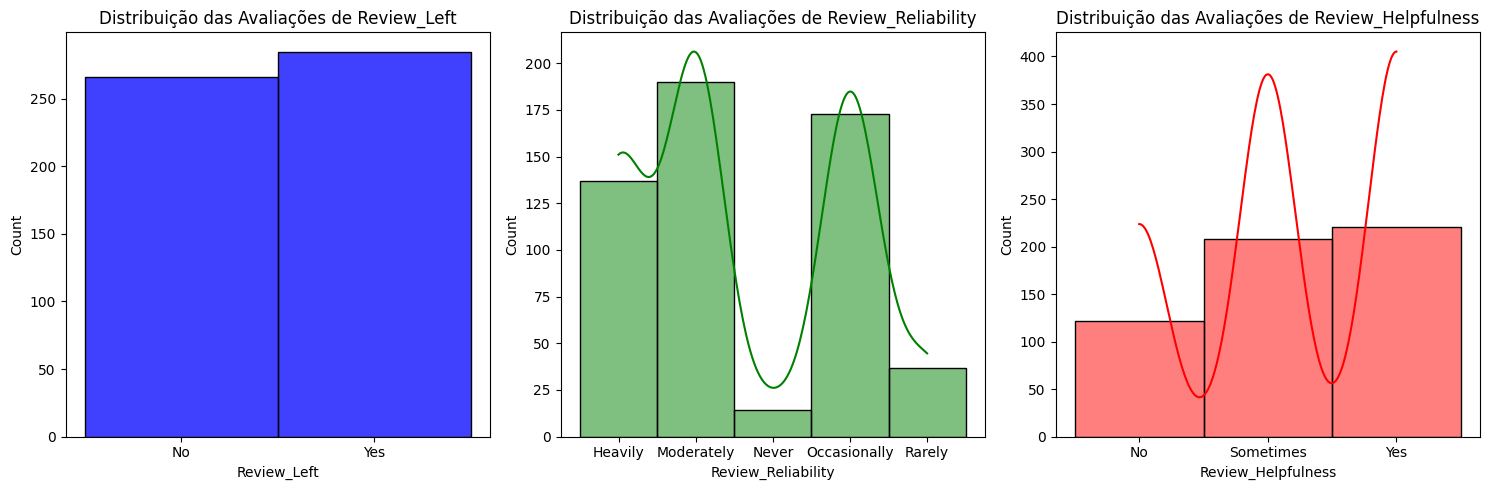

Review_Left
Yes    285
No     266
Name: count, dtype: int64


In [312]:
# Definir o tamanho da figura
plt.figure(figsize=(15, 5))

# Plotar histograma para cada variável
plt.subplot(1, 3, 1)
sns.histplot(df_amazon['Review_Left'], color='blue')
plt.title('Distribuição das Avaliações de Review_Left')

plt.subplot(1, 3, 2)
sns.histplot(df_amazon['Review_Reliability'], kde=True, color='green')
plt.title('Distribuição das Avaliações de Review_Reliability')

plt.subplot(1, 3, 3)
sns.histplot(df_amazon['Review_Helpfulness'], kde=True, color='red')
plt.title('Distribuição das Avaliações de Review_Helpfulness')

plt.tight_layout()
plt.show()

avaliacao = df_amazon['Review_Left'].value_counts()
print(avaliacao)

Distribuição das Avaliações de Review (Esquerda):
A barra “No” é significativamente mais alta do que a barra “Yes”. Isso indica que a maioria das avaliações não resultou em um review.
Conclusão: A proporção de avaliações sem review é alta.

Distribuição das Avaliações de Confiabilidade (Meio):
As barras representam diferentes níveis de confiabilidade (“Heavily”, “Moderately”, “Never” e “Occasionally”).

A categoria “Moderately” tem a maior frequência, seguida por “Occasionally”.
Conclusão: A confiabilidade dos reviews varia, mas a maioria está no nível moderado.

Distribuição das Avaliações de Utilidade (Direita):
As respostas estão distribuídas entre “No”, “Sometimes” e “Yes”.

Observa-se uma distribuição mais uniforme, com uma ligeira tendência para avaliações classificadas como “Yes”.
Conclusão: A maioria dos reviews é considerada útil.